Importing Necessary Packages

In [726]:
import tarfile, urllib, os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

%matplotlib inline
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Fetching Dataset

In [727]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
path = os.path.join("datasets", "housing") 
filepath = os.path.join(path, "housing.tgz")

if not os.path.isdir(path):
        os.makedirs(path)
        
urllib.request.urlretrieve(url, filepath)
housing_tgz = tarfile.open(filepath)
housing_tgz.extractall(path=path)
housing_tgz.close()

Load Dataset

In [728]:
df = pd.read_csv("datasets\housing\housing.csv")
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Object dtype

In [730]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Missing Values

In [731]:
df_nullinfos = pd.DataFrame({'missing': df.isnull().sum(), 'percent': df.isnull().mean().round(5) * 100})
df_nullinfos

,missing,percent
longitude,0,0.000
latitude,0,0.000
housing_median_age,0,0.000
total_rooms,0,0.000
total_bedrooms,207,1.003
population,0,0.000
households,0,0.000
median_income,0,0.000
median_house_value,0,0.000
ocean_proximity,0,0.000


Data Statistics

In [732]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Correlations

In [733]:
#Making a copy of the original df to work with
housing = df.copy()


In [734]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Categorizing Median Income

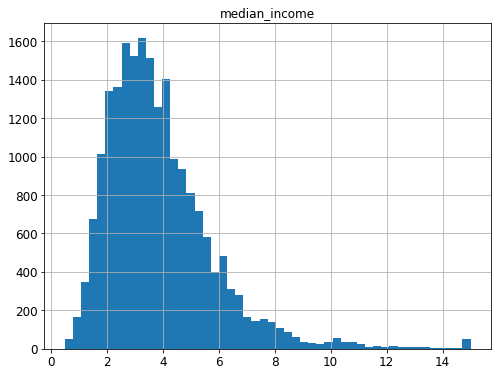

In [735]:
#Median Income appears to be a very important feature
#We are going to create income categories and stratify split the dataset based on those categories
housing.hist('median_income',bins = 50, figsize=(8,6))
plt.show()

<AxesSubplot:>

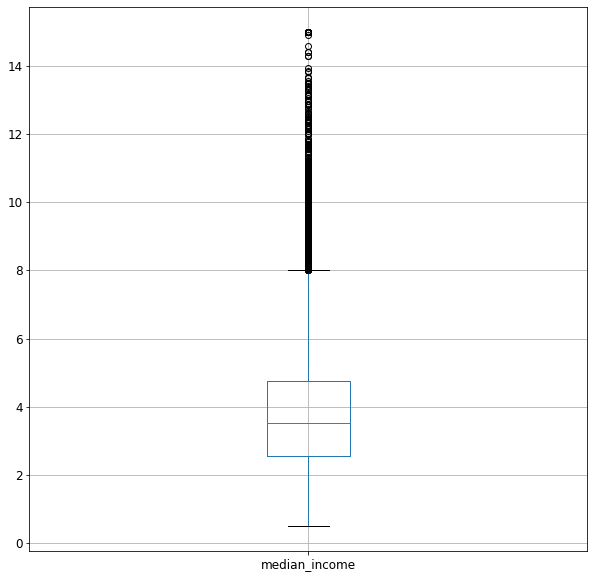

In [736]:
housing.boxplot('median_income', figsize=(10,10))

In [737]:
#Cutting to create categories
# bins = [0., 2.2, 3.8, 5, 8., 12., 14., np.inf]
#min, 25%, 50%, 75%, max, outliers ....
bins = [0., 2.5, 3.5, 4.7, 8, np.inf]
housing['income_cat'] = pd.cut(housing["median_income"], bins = bins, labels = range(len(bins)-1)) 

<AxesSubplot:>

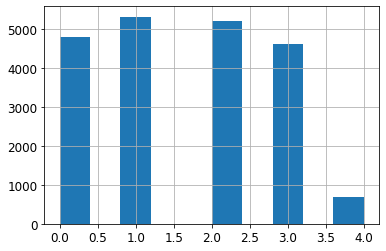

In [738]:
housing["income_cat"].hist()

Stratified Spliting

In [739]:
sss = StratifiedShuffleSplit(n_splits=1, test_size= 0.3, random_state= 42)
for train_index, test_index in sss.split(housing, housing['income_cat']):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

print(train_set["income_cat"].value_counts()/len(train_set))
print(test_set["income_cat"].value_counts()/len(test_set))

#We do not need the income_cat anymore, it was only used to stratifysplit so we can remove it
for dataset in [train_set, test_set]:
    dataset.drop('income_cat', axis=1, inplace=True)

train_set.head()

1    0.257683
2    0.252422
0    0.232766
3    0.223699
4    0.033430
Name: income_cat, dtype: float64
1    0.257590
2    0.252422
0    0.232881
3    0.223676
4    0.033430
Name: income_cat, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13614,-117.26,34.13,37.0,2403.0,550.0,1234.0,493.0,2.0000,72100.0,INLAND
15255,-117.26,33.04,18.0,2229.0,346.0,1088.0,352.0,6.3525,278300.0,NEAR OCEAN
8164,-118.13,33.81,36.0,1749.0,322.0,855.0,319.0,4.6473,227100.0,<1H OCEAN
3153,-118.46,35.12,16.0,4084.0,812.0,2033.0,668.0,3.2405,85500.0,INLAND
18238,-122.11,37.40,15.0,255.0,63.0,138.0,74.0,4.6591,175000.0,NEAR BAY


In [740]:
#Does Exact same thing as stratified Shuffling if n_splits = 1 and same random_state 
# X = housing.drop('median_house_value', axis = 1)
# y = housing['median_house_value']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=housing['income_cat'])

# print(X_train["income_cat"].value_counts()/len(X_train))
# print(X_test["income_cat"].value_counts()/len(X_test))

# X_train.head()


Correlations and feature engineering

In [741]:
#We are going to leave the test set alone for now and make a copy of the new trainset
housing = train_set.copy()
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13614,-117.26,34.13,37.0,2403.0,550.0,1234.0,493.0,2.0,72100.0,INLAND


<AxesSubplot:>

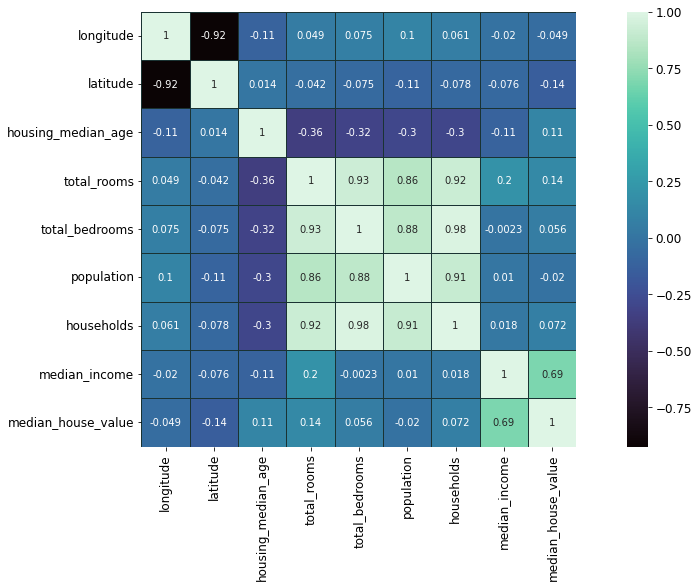

In [742]:
corr_matrix = housing.corr()
fig,ax = plt.subplots(1,1,figsize=(18,8))
sns.heatmap(corr_matrix, cmap="mako", square=True, annot= True, linewidths=1,linecolor=(0.1,0.2,0.2), ax = ax)


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

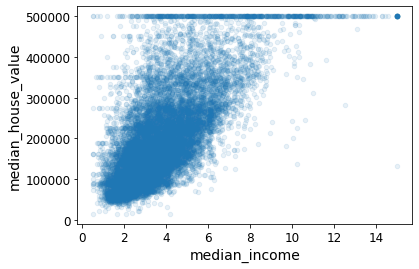

In [743]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha = 0.1)

There appear to be caps at approximately 500k, 450k, 350k, and 200k ish, sign of poor data, we might have to drop some of these caps

Lets try to find and create some useful features

In [744]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687902
total_rooms           0.138373
housing_median_age    0.112861
households            0.072025
total_bedrooms        0.056108
population           -0.019804
longitude            -0.049378
latitude             -0.142880
Name: median_house_value, dtype: float64

In [745]:
#Median income is dropped from the feature generation as it is already veeeery correlated to house value
insigfeatures = ["ocean_proximity", "longitude", "latitude", "median_house_value", "median_income"]
features = [feature for feature in list(housing.columns) if feature not in insigfeatures]
for feature1 in features:
    for feature2 in features:
        if feature1 != feature2:
            housing[f'{feature1}_per_{feature2}'] = housing[feature1]/housing[feature2]

In [746]:
corr_matrix = housing.corr()
importantMatrix = corr_matrix["median_house_value"].sort_values(ascending=False)
importantMatrix.where(abs(importantMatrix) > 0.2).dropna()


median_house_value                1.000000
median_income                     0.687902
total_rooms_per_total_bedrooms    0.381734
households_per_population         0.263735
households_per_total_rooms       -0.207871
total_bedrooms_per_total_rooms   -0.248717
Name: median_house_value, dtype: float64

We can see that the most influential new features lets try making a transformer that creates these features for us

In [747]:
housing = train_set.copy()
housing = housing.drop("median_house_value", axis = 1)
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13614,-117.26,34.13,37.0,2403.0,550.0,1234.0,493.0,2.0000,INLAND
15255,-117.26,33.04,18.0,2229.0,346.0,1088.0,352.0,6.3525,NEAR OCEAN
8164,-118.13,33.81,36.0,1749.0,322.0,855.0,319.0,4.6473,<1H OCEAN


In [748]:
from sklearn.base import BaseEstimator, TransformerMixin
#We want [total_rooms per total bedrooms] and [households per population] and [households per total rooms]

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_rooms_per_bedrooms = True, add_households_per_population = True, add_households_per_total_rooms = True):
        self.add_rooms_per_bedrooms = add_rooms_per_bedrooms
        self.add_households_per_population = add_households_per_population
        self.add_households_per_total_rooms = add_households_per_total_rooms
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        transforms = []
        if self.add_rooms_per_bedrooms:
            rooms_per_bedrooms = X[:, rooms_ix] / X[:, bedrooms_ix]
            transforms.append(rooms_per_bedrooms)

        if self.add_households_per_population:
            households_per_population = X[:, households_ix] / X[:, population_ix]
            transforms.append(households_per_population)

        if self.add_households_per_total_rooms:
            households_per_rooms = X[:, households_ix] / X[:, rooms_ix]
            transforms.append(households_per_rooms)
            return np.c_[X, rooms_per_bedrooms, households_per_population, households_per_rooms]
        
        else:
            return np.c_[X, rooms_per_bedrooms, households_per_population]


attr_adder = CombinedAttributesAdder()

In [749]:
#Looks good so far, lets build the pipeline !
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

housing_num = housing.drop('ocean_proximity', axis = 1)

X_train = train_set.copy().drop('median_house_value', axis = 1)
X_test = test_set.copy().drop('median_house_value', axis = 1)
y_train = train_set.copy()['median_house_value']
y_test = test_set.copy()['median_house_value']



num_attribs = list(housing_num)

cat_attribs = ['ocean_proximity']

num_transformer = Pipeline([('imputer', SimpleImputer(strategy="median")),
                            ('attribs_adder', CombinedAttributesAdder()),
                            ('std_scaler', StandardScaler()),
                            ])

preprocessor = ColumnTransformer([('num', num_transformer, num_attribs),
                                  ('cat', OneHotEncoder(), cat_attribs)])


X_train = preprocessor.fit_transform(X_train)
X_train




['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


array([[ 1.15258232, -0.70362886,  0.66030678, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.15258232, -1.21391791, -0.84668214, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.71819404, -0.85343849,  0.58099157, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.35388798,  1.01918185,  1.85003487, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.48851748, -0.68022111, -1.71914941, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64329951, -0.8908909 ,  0.81893719, ...,  0.        ,
         0.        ,  1.        ]])

Now to select and train a model on the prepared data !